In [36]:
# random forest regressor on 20m resolution images

import numpy as np
import pandas as pd
import sklearn
import math

In [15]:
df = pd.read_csv(r"./dataset-Icheon&CHL/2000_20m_final_20221104.csv", low_memory = False)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             262 non-null    int64  
 1   xcoord(long)   262 non-null    float64
 2   ycoord(lat)    262 non-null    float64
 3   sampling date  262 non-null    object 
 4   sensing date   262 non-null    object 
 5   B2             262 non-null    int64  
 6   B3             262 non-null    int64  
 7   B4             262 non-null    int64  
 8   B5             262 non-null    int64  
 9   B6             262 non-null    int64  
 10  B7             262 non-null    int64  
 11  B8A            262 non-null    int64  
 12  B11            262 non-null    int64  
 13  B12            262 non-null    int64  
 14  NDVI           262 non-null    float64
 15  BSI            262 non-null    float64
 16  EVI            262 non-null    float64
 17  Sand (%)       21 non-null     float64
 18  Silt (%)  

In [32]:
df = pd.DataFrame(df[['B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','SOC']])

In [35]:
df.head()

,B2,B3,B4,B5,B6,B7,B8A,B11,B12,NDVI,BSI,SOC
0,3075,3914,4958,5340,5515,5755,5967,6441,4969,0.092357,0.115307,0.86
1,2955,3741,4904,5519,5619,5813,5986,6298,4692,0.099357,0.112247,0.87
2,2907,3692,4737,5347,5423,5666,5909,6465,4969,0.110088,0.119193,1.00
3,2753,3298,3778,3928,4175,4433,4638,5442,4830,0.102186,0.110108,0.84
4,3080,3774,4587,4769,5372,5739,5826,6558,5134,0.118986,0.111665,1.07


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [115]:
x = df.iloc[:, :-1]
print(x)

       B2    B3    B4    B5    B6    B7   B8A   B11   B12      NDVI       BSI
0    3075  3914  4958  5340  5515  5755  5967  6441  4969  0.092357  0.115307
1    2955  3741  4904  5519  5619  5813  5986  6298  4692  0.099357  0.112247
2    2907  3692  4737  5347  5423  5666  5909  6465  4969  0.110088  0.119193
3    2753  3298  3778  3928  4175  4433  4638  5442  4830  0.102186  0.110108
4    3080  3774  4587  4769  5372  5739  5826  6558  5134  0.118986  0.111665
..    ...   ...   ...   ...   ...   ...   ...   ...   ...       ...       ...
257  2054  2484  2878  3196  3347  3505  3578  4304  3870  0.108426  0.120961
258  2032  2418  2791  3165  3318  3446  3585  4250  3802  0.124529  0.112498
259  2006  2417  2814  3137  3297  3434  3573  4304  3876  0.118835  0.121210
260  2027  2407  2756  3122  3377  3449  3649  4283  3924  0.139422  0.107196
261  2043  2483  2853  3178  3425  3555  3656  4255  3901  0.123368  0.110018

[262 rows x 11 columns]


In [63]:
# normalize1
from sklearn.preprocessing import minmax_scale

In [95]:
X_MinMax_scaled = minmax_scale(x, axis=0, copy=True)
print(X_MinMax_scaled)

[[0.43314217 0.56535478 0.7403821  ... 0.5377808  0.39912149 0.16519657]
 [0.39692122 0.51565642 0.72624967 ... 0.47492625 0.44372676 0.13181144]
 [0.38243284 0.50158001 0.68254384 ... 0.5377808  0.51210497 0.20758486]
 ...
 [0.11047389 0.13530595 0.17927244 ... 0.28976628 0.56783959 0.22959048]
 [0.11681256 0.13243321 0.16409317 ... 0.30065804 0.69902062 0.07670262]
 [0.12164202 0.15426602 0.18947919 ... 0.29543907 0.59672062 0.10748783]]


In [178]:
# normalize2
# band 값만 10000으로 나누기
df['B2'] = df['B2']/10000
df['B3'] = df['B3']/10000
df['B4'] = df['B4']/10000
df['B5'] = df['B5']/10000
df['B6'] = df['B6']/10000
df['B7'] = df['B7']/10000
df['B8A'] = df['B8A']/10000
df['B11'] = df['B11']/10000
df['B12'] = df['B12']/10000
print(df)

           B2      B3      B4      B5      B6      B7     B8A     B11     B12  \
0    0.000031  0.3914  0.4958  0.5340  0.5515  0.5755  0.5967  0.6441  0.4969   
1    0.000030  0.3741  0.4904  0.5519  0.5619  0.5813  0.5986  0.6298  0.4692   
2    0.000029  0.3692  0.4737  0.5347  0.5423  0.5666  0.5909  0.6465  0.4969   
3    0.000028  0.3298  0.3778  0.3928  0.4175  0.4433  0.4638  0.5442  0.4830   
4    0.000031  0.3774  0.4587  0.4769  0.5372  0.5739  0.5826  0.6558  0.5134   
..        ...     ...     ...     ...     ...     ...     ...     ...     ...   
257  0.000021  0.2484  0.2878  0.3196  0.3347  0.3505  0.3578  0.4304  0.3870   
258  0.000020  0.2418  0.2791  0.3165  0.3318  0.3446  0.3585  0.4250  0.3802   
259  0.000020  0.2417  0.2814  0.3137  0.3297  0.3434  0.3573  0.4304  0.3876   
260  0.000020  0.2407  0.2756  0.3122  0.3377  0.3449  0.3649  0.4283  0.3924   
261  0.000020  0.2483  0.2853  0.3178  0.3425  0.3555  0.3656  0.4255  0.3901   

         NDVI       BSI   S

In [179]:
y = df.iloc[:, -1:]

In [180]:
print(y)

      SOC
0    0.86
1    0.87
2    1.00
3    0.84
4    1.07
..    ...
257  2.61
258  2.37
259  3.68
260  3.22
261  3.30

[262 rows x 1 columns]


In [181]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=0)

In [182]:
##########모델 생성

model = RandomForestRegressor()

In [183]:
### Tree 최적화


In [184]:
##########모델 학습

model.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [185]:
##########모델 검증

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #

0.9305249318117434
0.5211322321241567


In [186]:
# R-squared

model.score(x.values,y.values)

0.8154360179424227

In [187]:
print(x.values.shape)
print(model.predict(x.values).shape)
print(y.values.shape)

(262, 11)
(262,)
(262, 1)


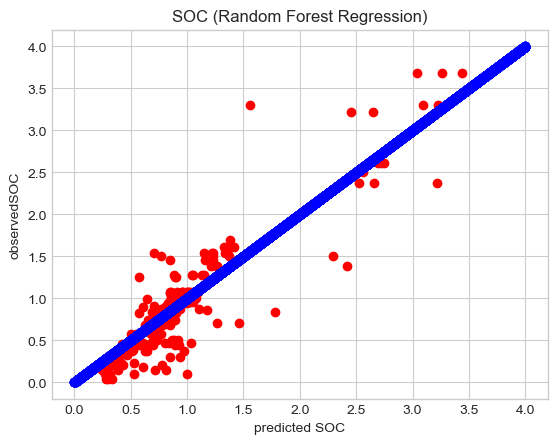

In [188]:
# Predicted versus observed SOC
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
X_grid = np.linspace(math.floor(min(model.predict(x.values))), math.ceil(max(model.predict(x.values))),10000)  # X의 최소값부터 X의 최대값까지 0.01 단위로 값 채우기
#X_grid = X_grid.reshape((len(X_grid),1))  # n X 1 행렬로 변환
plt.scatter(model.predict(x.values), y.values, color='red')
plt.scatter(X_grid,X_grid, color='blue')
plt.title('SOC (Random Forest Regression)')
plt.xlabel('predicted SOC')
plt.ylabel('observedSOC')
plt.show()

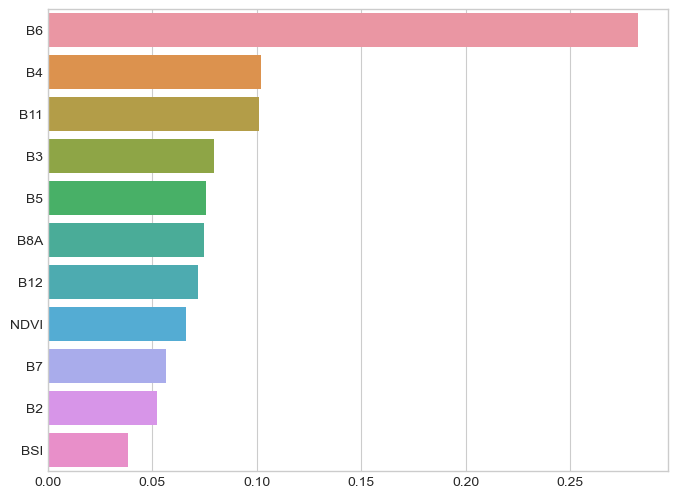

In [189]:
# feature importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()